In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

# ***LOAD THE DATASET***

In [2]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [3]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/kaggle/input/TESS Toronto emotional speech se...,fear
1,/kaggle/input/TESS Toronto emotional speech se...,fear
2,/kaggle/input/TESS Toronto emotional speech se...,fear
3,/kaggle/input/TESS Toronto emotional speech se...,fear
4,/kaggle/input/TESS Toronto emotional speech se...,fear


# ***FEATURE EXTRACTION***

In [4]:
# Function to extract features from audio file
def extract_features(audio_path):
    # Load audio file
    y, sr = librosa.load(audio_path, sr=16000)  # Resample to 16kHz
    
    # Extract MFCC features and energy
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    energy = librosa.feature.rms(y=y)
    
    # Combine energy and MFCC features
    features = np.vstack((energy, mfcc))
    
    return features.T  # Transpose to have features in rows

In [5]:
# Define parameters
frame_size = 0.005  # Duration for each frame in seconds
segment_size = 10   # Number of frames per segment
hop_size = 5        # Number of overlapping frames per segment


In [6]:
# Initialize an empty list to store features and labels
all_features = []
labels = []

# Iterate through each row in the dataframe
for index, row in df.iterrows():
    audio_path = row['speech']  # Get the path of the audio file
    emotion_label = row['label']  # Get the emotion label
    
    # Extract features from the audio file
    features = extract_features(audio_path)
    
    # Divide features into segments
    num_frames = features.shape[0]
    for start in range(0, num_frames - segment_size + 1, hop_size):
        end = start + segment_size
        segment = features[start:end, :]
        
        # Append segment features and label
        segment_features = {}
        for i in range(segment.shape[1]):
            if i == 0:
                segment_features[f'energy'] = np.mean(segment[:, i])
            else:
                segment_features[f'mfcc_{i}'] = np.mean(segment[:, i])
        
        all_features.append(segment_features)
        labels.append(emotion_label)

# Create a dataframe from the features and labels
df_features = pd.DataFrame(all_features)
df_features['label'] = labels

# Display the resulting dataframe
print(df_features.head())

     energy      mfcc_1      mfcc_2     mfcc_3     mfcc_4     mfcc_5  \
0  0.080812 -228.493210   23.839323  38.730095  29.853260  -9.037081   
1  0.140357 -146.153351   83.280212  14.387001  38.866020 -20.312580   
2  0.146112 -184.766891  130.305939   8.778957  12.554975  -0.977290   
3  0.136731 -187.785156  109.411026 -15.229784  26.244198   4.960491   
4  0.126498 -162.197479   73.918427 -17.360674  25.893192  -7.318707   

      mfcc_6    mfcc_7     mfcc_8     mfcc_9    mfcc_10    mfcc_11    mfcc_12  \
0  -6.489331 -7.206201 -13.207417 -18.946136 -15.778669  -0.904743  -1.437934   
1 -12.537031 -9.525454 -16.636494 -17.446608 -19.529442  -3.550506 -10.322148   
2  10.557305  6.399426   0.663918   3.969740 -15.476713   6.202796  -2.093007   
3  14.488367  0.995551   3.854404  12.427521 -23.954327   5.205208   7.981890   
4  24.404867  4.280827  -2.526848  11.383504  -6.167575 -14.081141  18.078873   

     mfcc_13 label  
0   7.353501  fear  
1  10.720842  fear  
2   3.660483  fea

In [7]:
df_features.head()

,energy,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,label
0,0.080812,-228.493210,23.839323,38.730095,29.853260,-9.037081,-6.489331,-7.206201,-13.207417,-18.946136,-15.778669,-0.904743,-1.437934,7.353501,fear
1,0.140357,-146.153351,83.280212,14.387001,38.866020,-20.312580,-12.537031,-9.525454,-16.636494,-17.446608,-19.529442,-3.550506,-10.322148,10.720842,fear
2,0.146112,-184.766891,130.305939,8.778957,12.554975,-0.977290,10.557305,6.399426,0.663918,3.969740,-15.476713,6.202796,-2.093007,3.660483,fear
3,0.136731,-187.785156,109.411026,-15.229784,26.244198,4.960491,14.488367,0.995551,3.854404,12.427521,-23.954327,5.205208,7.981890,-5.834584,fear
4,0.126498,-162.197479,73.918427,-17.360674,25.893192,-7.318707,24.404867,4.280827,-2.526848,11.383504,-6.167575,-14.081141,18.078873,-14.727171,fear


In [8]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'label' column
df_features['label_encoded'] = label_encoder.fit_transform(df_features['label'])

# Display the DataFrame with the encoded labels
print(df_features)


         energy      mfcc_1      mfcc_2     mfcc_3     mfcc_4     mfcc_5  \
0      0.080812 -228.493210   23.839323  38.730095  29.853260  -9.037081   
1      0.140357 -146.153351   83.280212  14.387001  38.866020 -20.312580   
2      0.146112 -184.766891  130.305939   8.778957  12.554975  -0.977290   
3      0.136731 -187.785156  109.411026 -15.229784  26.244198   4.960491   
4      0.126498 -162.197479   73.918427 -17.360674  25.893192  -7.318707   
...         ...         ...         ...        ...        ...        ...   
32308  0.024127 -450.556824   96.723831  10.157843   7.679128 -10.511429   
32309  0.058912 -273.594910  110.430748 -18.375330 -53.022118 -53.648151   
32310  0.062446 -267.686157  102.099548  -4.733881 -63.026207 -68.910393   
32311  0.034257 -363.756805   88.744759  11.467415 -22.271477 -46.264580   
32312  0.014969 -416.637787    1.479474  22.827801  -5.806013  -8.625296   

          mfcc_6     mfcc_7     mfcc_8     mfcc_9    mfcc_10    mfcc_11  \
0      -6.48

In [9]:
df_features.head()

,energy,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,label,label_encoded
0,0.080812,-228.493210,23.839323,38.730095,29.853260,-9.037081,-6.489331,-7.206201,-13.207417,-18.946136,-15.778669,-0.904743,-1.437934,7.353501,fear,2
1,0.140357,-146.153351,83.280212,14.387001,38.866020,-20.312580,-12.537031,-9.525454,-16.636494,-17.446608,-19.529442,-3.550506,-10.322148,10.720842,fear,2
2,0.146112,-184.766891,130.305939,8.778957,12.554975,-0.977290,10.557305,6.399426,0.663918,3.969740,-15.476713,6.202796,-2.093007,3.660483,fear,2
3,0.136731,-187.785156,109.411026,-15.229784,26.244198,4.960491,14.488367,0.995551,3.854404,12.427521,-23.954327,5.205208,7.981890,-5.834584,fear,2
4,0.126498,-162.197479,73.918427,-17.360674,25.893192,-7.318707,24.404867,4.280827,-2.526848,11.383504,-6.167575,-14.081141,18.078873,-14.727171,fear,2


In [10]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
# Initialize the encoder
encoder = OneHotEncoder()

# Reshape the 'label' column to a 2D array
labels_2d = df_features['label'].values.reshape(-1, 1)

# Fit and transform the 'label' column
labels_encoded = encoder.fit_transform(labels_2d)

# Convert the encoded labels to an array
labels_array = labels_encoded.toarray()

# Create a DataFrame with the encoded labels
encoded_labels_df = pd.DataFrame(labels_array, columns=encoder.categories_[0])

# Concatenate the original DataFrame and the encoded labels DataFrame
encoded_df = pd.concat([df_features.drop(columns=['label']), encoded_labels_df], axis=1)




In [11]:
encoded_df.head()

,energy,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,mfcc_12,mfcc_13,label_encoded,angry,disgust,fear,happy,neutral,ps,sad
0,0.080812,-228.493210,23.839323,38.730095,29.853260,-9.037081,-6.489331,-7.206201,-13.207417,-18.946136,...,-1.437934,7.353501,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.140357,-146.153351,83.280212,14.387001,38.866020,-20.312580,-12.537031,-9.525454,-16.636494,-17.446608,...,-10.322148,10.720842,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.146112,-184.766891,130.305939,8.778957,12.554975,-0.977290,10.557305,6.399426,0.663918,3.969740,...,-2.093007,3.660483,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.136731,-187.785156,109.411026,-15.229784,26.244198,4.960491,14.488367,0.995551,3.854404,12.427521,...,7.981890,-5.834584,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.126498,-162.197479,73.918427,-17.360674,25.893192,-7.318707,24.404867,4.280827,-2.526848,11.383504,...,18.078873,-14.727171,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [12]:
# Assuming 'n' is the index of the row you want to print
n = 1000  # Example value

# Print the nth row of the encoded DataFrame
print(encoded_df.iloc[n])


energy             0.062522
mfcc_1          -295.876190
mfcc_2            85.797386
mfcc_3            -9.432695
mfcc_4            12.689219
mfcc_5            17.596294
mfcc_6            18.287197
mfcc_7             0.440594
mfcc_8           -12.760405
mfcc_9            17.396357
mfcc_10          -17.707199
mfcc_11            7.647213
mfcc_12            8.640295
mfcc_13            2.164061
label_encoded      2.000000
angry              0.000000
disgust            0.000000
fear               1.000000
happy              0.000000
neutral            0.000000
ps                 0.000000
sad                0.000000
Name: 1000, dtype: float64


In [13]:
# Assuming 'n' is the index of the row you want to print
n = 1000  # Example value

# Print the nth row of the encoded DataFrame
print(df_features.iloc[n])


energy            0.062522
mfcc_1          -295.87619
mfcc_2           85.797386
mfcc_3           -9.432695
mfcc_4           12.689219
mfcc_5           17.596294
mfcc_6           18.287197
mfcc_7            0.440594
mfcc_8          -12.760405
mfcc_9           17.396357
mfcc_10         -17.707199
mfcc_11           7.647213
mfcc_12           8.640295
mfcc_13           2.164061
label                 fear
label_encoded            2
Name: 1000, dtype: object


# ***ML MODELS***

In [14]:
X = df_features.iloc[:, 0:13].values
y = df_features.iloc[:, -1].values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc=  sc.transform(X_test)

In [17]:
print(X_train)

[[ 1.4025512e-01 -2.5260544e+02  9.9643967e+01 ... -3.8068665e+01
   2.2953548e+01 -1.0297335e+01]
 [ 1.3920868e-02 -5.2637323e+02  1.4810214e+02 ... -9.3818722e+00
  -1.4554245e+00 -8.5354729e+00]
 [ 1.2429493e-02 -4.0482434e+02  6.3435316e+00 ... -1.0320032e+01
  -1.5242140e+00  4.2859797e+00]
 ...
 [ 1.8244265e-02 -4.5721564e+02  4.4483574e+01 ... -1.0076873e+01
  -1.0941698e+01 -4.9692330e+00]
 [ 6.9146394e-03 -4.1420630e+02 -4.8152565e+01 ... -2.8518322e+00
   7.9056883e+00  8.6868153e+00]
 [ 2.0188743e-02 -3.9222247e+02  6.4336830e+01 ... -2.9532447e+00
  -1.5127981e+00  6.4157081e+00]]


In [18]:
print(X_train_sc)

[[ 4.1385617   1.3476242   0.6981429  ... -2.6712658   2.270823
  -0.88780665]
 [-0.6946208  -1.4403712   1.5725613  ... -0.02078778  0.08357801
  -0.69549596]
 [-0.7516765  -0.202542   -0.98544526 ... -0.10746783  0.07741391
   0.70399094]
 ...
 [-0.52922016 -0.7360843  -0.29721567 ... -0.08500145 -0.76647025
  -0.30623388]
 [-0.9626588  -0.29808596 -1.9688166  ...  0.5825466   0.9224109
   1.1843508 ]
 [-0.45483008 -0.07420715  0.0610325  ...  0.57317674  0.07843687
   0.93645495]]


In [19]:
print(y_train)

[0 1 6 ... 4 0 0]


***SVM***

In [20]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear')
classifier.fit(X_train_sc, y_train)

SVC(kernel='linear')

*Accuracy On Training Set and Test Set*

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Predict labels for training and test sets
y_train_pred_svc = classifier.predict(X_train_sc)
y_test_pred_svc = classifier.predict(X_test_sc)

# Calculate accuracy for training and test sets
train_accuracy = accuracy_score(y_train, y_train_pred_svc)
test_accuracy = accuracy_score(y_test, y_test_pred_svc)

print("Training Set Accuracy:", train_accuracy)
print("Test Set Accuracy:", test_accuracy)

Training Set Accuracy: 0.5550870406189555
Test Set Accuracy: 0.5568621383258548


*Plot Of Confusion Matrix*

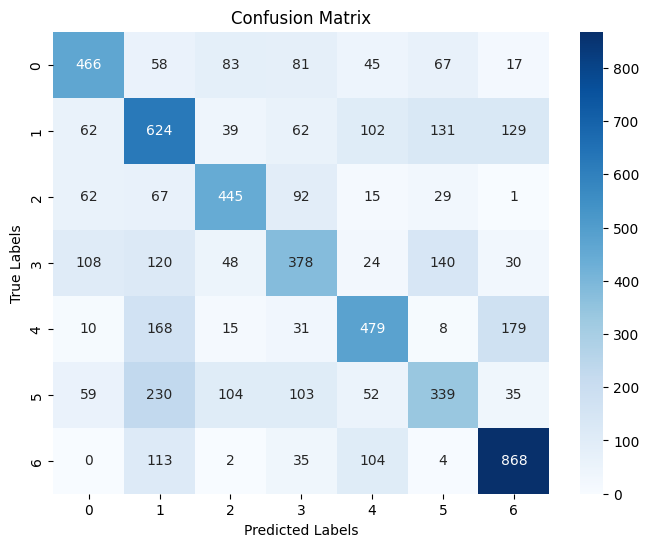

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot confusion matrix for test set
conf_matrix_svc = confusion_matrix(y_test, y_test_pred_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Gradient Boosting

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=300,learning_rate=0.05,random_state=100, max_features=5)
gbc.fit(X_train,y_train)
 

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=300,
                           random_state=100)

*Accuracy On Training Set and Test Set*


In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Predict labels for training and test sets
y_train_pred_gbc = gbc.predict(X_train)
y_test_pred_gbc = gbc.predict(X_test)

# Calculate accuracy for training and test sets
train_accuracy = accuracy_score(y_train, y_train_pred_gbc)
test_accuracy = accuracy_score(y_test, y_test_pred_gbc)

print("Training Set Accuracy:", train_accuracy)
print("Test Set Accuracy:", test_accuracy)

Training Set Accuracy: 0.8122630560928433
Test Set Accuracy: 0.7620300170199598


*Plot Of Confusion Matrix*

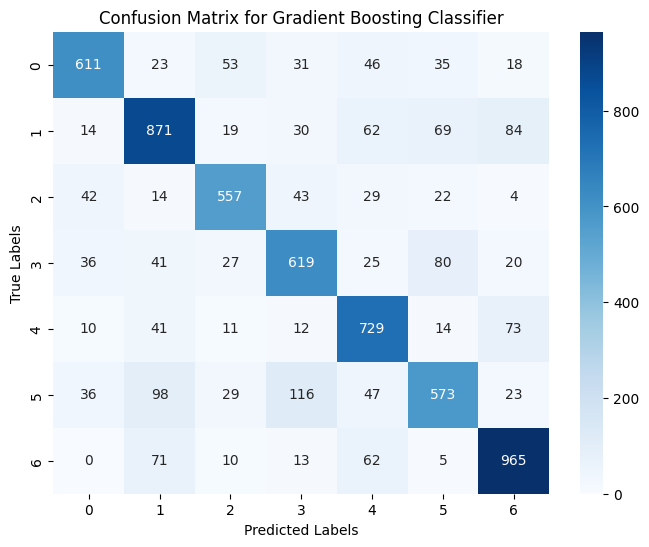

In [27]:
# Calculate confusion matrix for test set
conf_matrix_gbc = confusion_matrix(y_test, y_test_pred_gbc)

# Plot confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gbc, annot=True, fmt='d', cmap='Blues',xticklabels=gbc.classes_, yticklabels=gbc.classes_)
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Random Forest Classification

In [29]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_sc, y_train)

RandomForestClassifier(random_state=42)

*Accuracy On Training Set and Test Set*

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Predict labels for training and test sets
y_train_pred_rf = classifier.predict(X_train_sc)
y_test_pred_rf = classifier.predict(X_test_sc)

# Calculate accuracy for training and test sets
train_accuracy = accuracy_score(y_train, y_train_pred_rf)
test_accuracy = accuracy_score(y_test, y_test_pred_rf)

print("Training Set Accuracy:", train_accuracy)
print("Test Set Accuracy:", test_accuracy)

Training Set Accuracy: 1.0
Test Set Accuracy: 0.8412501934086337


*Plot Of Confusion Matrix*

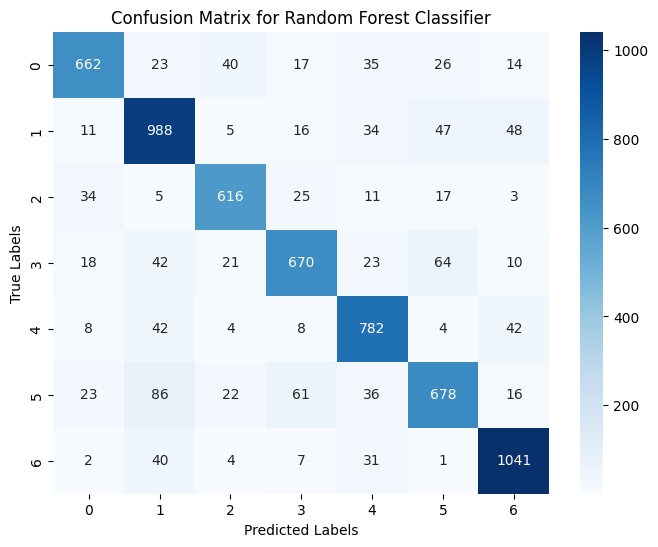

In [31]:
# Calculate confusion matrix for test set
conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)
# Plot confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues',xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()